#  Twitter Sentiment Analysis Classifier 


This notebook presents a model to classify Twitter in positive or negative 

## Data SET 
The used dataset is the Twitter Sentiment Analysis Training Corpus, it contains 1,5 M classificated twitters. it's avable in  http://thinknook.com/twitter-sentiment-analysis-training-corpus-dataset-2012-09-22/

each row is marked as 1 for positive sentiment and 0 for negative sentiment. 





In [1]:
path = 'Sentiment_Analysis_Dataset.csv'
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
df = pd.read_csv(path , error_bad_lines=False)
df.head()




b'Skipping line 8836: expected 4 fields, saw 5\n'
b'Skipping line 535882: expected 4 fields, saw 7\n'


,ItemID,Sentiment,SentimentSource,SentimentText
0,1,0,Sentiment140,is so sad for my APL frie...
1,2,0,Sentiment140,I missed the New Moon trail...
2,3,1,Sentiment140,omg its already 7:30 :O
3,4,0,Sentiment140,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0,Sentiment140,i think mi bf is cheating on me!!! ...


In [2]:
dfSentiment140 = df[(df['SentimentSource'] == 'Sentiment140' )]
print (' Source Sentiment140 = ', dfSentiment140.shape[0])
dfKaggle = df[(df['SentimentSource'] == 'Kaggle' )]
print (' Source Kaggle = ', dfKaggle.shape[0])
dfpositive = df[(df['Sentiment'] == 1 )]
print (' Positive  = ', df[(df['Sentiment'] == 1 )].shape[0], ' Negative  = ', df[(df['Sentiment'] == 0 )].shape[0] )




 Source Sentiment140 =  1577269
 Source Kaggle =  1343
 Positive  =  790177  Negative  =  788435


# Check Zipf law for the top-10 most positive words, top-10 negative words 



In [3]:
import re
import nltk
import string
from collections import Counter 


def calcDistribution(subdf):
    lista = subdf['SentimentText'].tolist()
    sent_str = ""
    for i in lista:
        sent_str += str(i) + " "
        
    sent_str = re.sub("[^a-zA-Z]", " " , sent_str )
    words = nltk.word_tokenize(sent_str.lower())  
    # Pass the split_it list to instance of Counter class. 
      
    # most_common() produces k frequently encountered 
    # input values and their respective counts. 
    return Counter(words).most_common(10)





In [4]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

def printDistibution(most_occur):
    fqs=[]
    ratings=[]
    i =1
    for word_occur in most_occur:
        fq= word_occur[1]
        word =  word_occur[0]
        fqs.append(fq)
        ratings.append(i)
        print(str(i) + ' ' + word + ' ' + str(fq)) 
        i = i +1


    fig, ax = plt.subplots()
    ax.plot(ratings, fqs )

    ax.set(xlabel='rating ', ylabel='frequency ',
           title='Distribution function')
    ax.grid()
    plt.show()



1 i 381880
2 the 265357
3 to 250508
4 a 199949
5 you 196945
6 and 149097
7 it 147212
8 my 125192
9 for 116599
10 is 109231


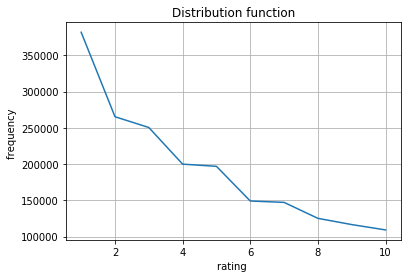

In [5]:
# distribution od positive phases
dfpositive = df[(df['Sentiment'] == 1 )]
most_occurpos = calcDistribution(dfpositive)
printDistibution(most_occurpos) 




1 i 572591
2 to 311340
3 the 257932
4 my 188932
5 a 183232
6 it 157044
7 and 153753
8 is 127717
9 t 126114
10 in 115303


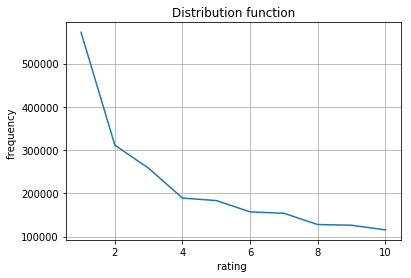

In [6]:
# distribution od positive phases
dfNeg = df[(df['Sentiment'] == 0 )]
most_occurNeg = calcDistribution(dfNeg)
printDistibution(most_occurNeg) 




  

The distribuiton of words of the  positive and negative prases is in agreement with dZipf law
The frequency of the words are inversely proportional to its rank in the frequency table



# Sentiment Classifier 
   
    As Classifier I used a NaiveBayes and bag of words model.
    
   NaiveBayes is a very simple technique that can generate good results for sentiment analysis if you have a  good bag of words.
   To help the classifier I simplified the bag of words by some simpel modifications:
      - take off the english stop words;
      - trasnform the words in lower case ;
      - replace the special characters by space character. 
       

##  let's get the English stop words



In [7]:
import nltk
import string
nltk.download("stopwords")
stop_words = nltk.corpus.stopwords.words("english") + list(string.punctuation)


[nltk_data] Downloading package stopwords to /home/leo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
dimention = df.shape[0]
df["SentimentText"].head()
df = df.drop(['ItemID'], axis = 1)
df = df.drop(['SentimentSource'], axis = 1)

df.head()




,Sentiment,SentimentText
0,0,is so sad for my APL frie...
1,0,I missed the New Moon trail...
2,1,omg its already 7:30 :O
3,0,.. Omgaga. Im sooo im gunna CRy. I'...
4,0,i think mi bf is cheating on me!!! ...


In [9]:
# split the data set for train and test 
def splitDataSet(df,  porportion):
    pdrandom = pd.DataFrame(np.random.randn(dimention, 2))
    msk = np.random.rand(len(df)) < porportion

    train = df[msk]
    test = df[~msk]
    return train , test

train, test  = splitDataSet(df, 0.8)
print(train.shape)
print(test.shape)


(1263104, 2)
(315508, 2)


In [10]:
import re
# SentimentText  Sentiment
def build_bag_of_words_filtered(sentence):
    
    sentence = re.sub("[^a-zA-Z]", " ",sentence.lower() )
    words = nltk.word_tokenize(sentence.lower())
    dicbag = {}
    for word in words:
        if not word in stop_words:
            dicbag[word] = 1
    return dicbag


tokesn = build_bag_of_words_filtered("the House is.. so big@@ great my#Love")

print(tokesn)





{'house': 1, 'big': 1, 'great': 1, 'love': 1}


In [11]:
def getDataSet(data):
    dataset = []
    for index, row in data.iterrows():
        dicbag = build_bag_of_words_filtered(row['SentimentText'])
        thistuple = (dicbag,row['Sentiment'])
        dataset.append(thistuple)
    return dataset
    
traindataset = getDataSet(train)


In [12]:
testDaset = getDataSet(test)


In [13]:
print(len(traindataset))
print(len(testDaset))

    
 

1263104
315508


## Using NaiveBayesClassifier train the model 



In [14]:
from nltk.classify import NaiveBayesClassifier
sentiment_classifier = NaiveBayesClassifier.train(traindataset )



In [15]:
acuracy = nltk.classify.util.accuracy(sentiment_classifier, traindataset)*100
print('Accuracy train set complete =', acuracy)



Accuracy train set complete = 83.3783283086745


In [16]:

acuracytest = nltk.classify.util.accuracy(sentiment_classifier, testDaset)*100
print('Accuracy test set complete =', acuracytest)


Accuracy test set complete = 76.56604586888447


In [17]:

most = sentiment_classifier.show_most_informative_features(20)


Most Informative Features
            tweeteradder = 1                   1 : 0      =    435.1 : 1.0
                 fawcett = 1                   0 : 1      =    188.2 : 1.0
              recommends = 1                   1 : 0      =     61.5 : 1.0
                    sadd = 1                   0 : 1      =     57.2 : 1.0
               banksyart = 1                   1 : 0      =     50.2 : 1.0
             shareholder = 1                   1 : 0      =     44.9 : 1.0
                 sadface = 1                   0 : 1      =     43.1 : 1.0
                  ouchie = 1                   0 : 1      =     35.9 : 1.0
                  farrah = 1                   0 : 1      =     35.8 : 1.0
               xbllygbsn = 1                   0 : 1      =     35.8 : 1.0
                fuzzball = 1                   1 : 0      =     30.5 : 1.0
                 eddings = 1                   0 : 1      =     30.4 : 1.0
             disapointed = 1                   0 : 1      =     29.9 : 1.0

In [18]:
def show_most_informative_word(sentiment_classifier, sentiment, n):
        # Determine the most relevant features, and display them.
        cpdist = sentiment_classifier._feature_probdist
        
        
        for (fname, fval) in sentiment_classifier.most_informative_features(100):

            def labelprob(l):
                return cpdist[l, fname].prob(fval)

            labels = sorted(
                [l for l in sentiment_classifier._labels if fval in cpdist[l, fname].samples()],
                key=labelprob,
            )
            if len(labels) == 1:
                continue
                
            if labels[0] == sentiment:    
                print(fname )    
                n = n -1
            if n ==0:
                 return
                
           


In [19]:
print("The top-10 most positive words")
show_most_informative_word(sentiment_classifier, 0, 10)
    

The top-10 most positive words
tweeteradder
recommends
banksyart
shareholder
fuzzball
pleasantly
ivybean
smilin
thedailysurvey
nurul


In [21]:
print("The top-10 most negative words")
show_most_informative_word(sentiment_classifier, 1, 10)


The top-10 most negative words
fawcett
sadd
sadface
ouchie
farrah
xbllygbsn
eddings
disapointed
condolences
airfrance
